Task 1.1

In [ ]:
import pandas as pd

# Mount Google Drive to Colab (if not mounted already)
from google.colab import drive
drive.mount('/content/drive')

# Specify the file path
file_path = '/content/global_ai_ml_data_salaries.csv'

# Read the CSV file into a DataFrame
data = pd.read_csv(file_path)

# Display the first 10 rows of the DataFrame
data.head(10)


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2024,MI,FT,Business Intelligence,84021,USD,84021,CA,0,CA,M
1,2024,MI,FT,Business Intelligence,69000,USD,69000,CA,0,CA,M
2,2024,SE,FT,BI Developer,241600,USD,241600,US,0,US,M
3,2024,SE,FT,BI Developer,109800,USD,109800,US,0,US,M
4,2024,SE,FT,Machine Learning Modeler,245400,USD,245400,US,100,US,M
5,2024,SE,FT,Machine Learning Modeler,139000,USD,139000,US,100,US,M
6,2024,MI,FT,Business Intelligence,115000,USD,115000,US,0,US,M
7,2024,MI,FT,Business Intelligence,93000,USD,93000,US,0,US,M
8,2024,EN,FT,Data Analyst,62000,USD,62000,US,100,US,M
9,2024,EN,FT,Data Analyst,55000,USD,55000,US,100,US,M


In [ ]:
data_cleaned = data.drop_duplicates().copy()
missing_values = data_cleaned.isnull().sum()

numerical_stats = data_cleaned[['salary', 'salary_in_usd', 'remote_ratio']].describe()
print(numerical_stats)


             salary  salary_in_usd  remote_ratio
count  1.151400e+04   11514.000000  11514.000000
mean   1.683650e+05  147637.632187     34.010769
std    4.065013e+05   73070.390585     46.800139
min    1.400000e+04   15000.000000      0.000000
25%    9.577600e+04   95000.000000      0.000000
50%    1.400000e+05  139000.000000      0.000000
75%    1.900000e+05  187487.500000    100.000000
max    3.040000e+07  800000.000000    100.000000


In [ ]:
categorical_stats = data_cleaned[['work_year', 'experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']].describe()
print(categorical_stats)


          work_year
count  11514.000000
mean    2023.331944
std        0.777144
min     2020.000000
25%     2023.000000
50%     2023.000000
75%     2024.000000
max     2024.000000


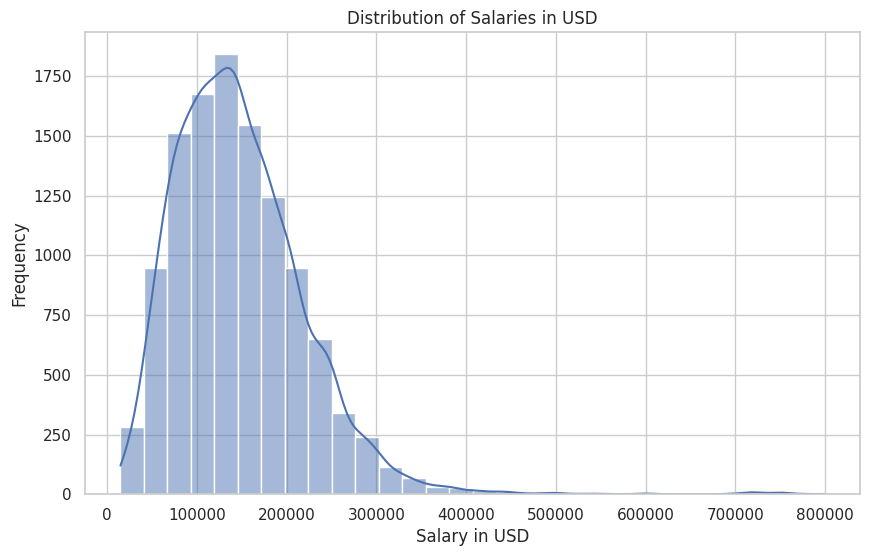

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style of the visualization
sns.set(style="whitegrid")

# Distribution of salaries
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['salary_in_usd'], bins=30, kde=True)
plt.title('Distribution of Salaries in USD')
plt.xlabel('Salary in USD')
plt.ylabel('Frequency')
plt.show()


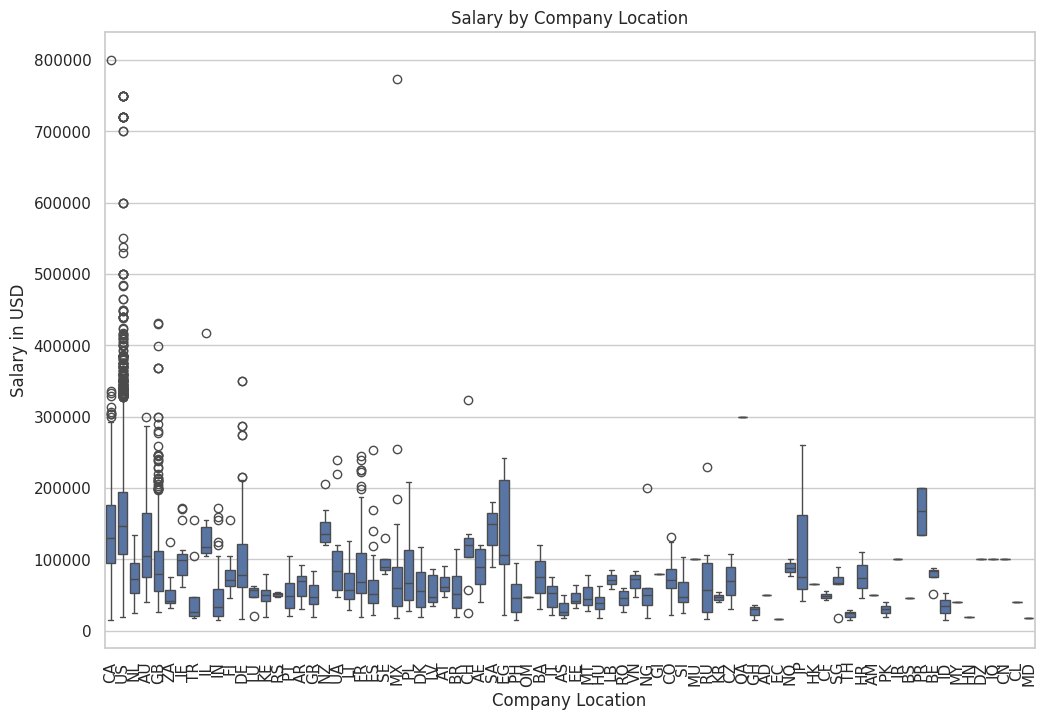

In [ ]:
# Salary by company location
plt.figure(figsize=(12, 8))
sns.boxplot(x='company_location', y='salary_in_usd', data=data_cleaned)
plt.title('Salary by Company Location')
plt.xlabel('Company Location')
plt.ylabel('Salary in USD')
plt.xticks(rotation=90)
plt.show()


Task 1.2

In [ ]:

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split

data_cleaned = data.drop_duplicates().copy()

# Encode categorical variables using LabelEncoder
label_encoder = LabelEncoder()
categorical_columns = ['experience_level', 'employment_type', 'job_title', 'salary_currency', 'employee_residence', 'company_location', 'company_size']
for col in categorical_columns:
    data_cleaned[col] = label_encoder.fit_transform(data_cleaned[col].astype(str))

# Scale numerical features using StandardScaler
scaler = StandardScaler()
numerical_columns = ['salary', 'remote_ratio']
data_cleaned[numerical_columns] = scaler.fit_transform(data_cleaned[numerical_columns])

# Define the target variable and features
X = data_cleaned.drop('salary_in_usd', axis=1)  # Features
y = data_cleaned['salary_in_usd']  # Target variable

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Task 1.3

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score,accuracy_score

# Initialize and train the Linear Regression model
linear_reg = LinearRegression()
linear_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_linear_reg = linear_reg.predict(X_test)
mse_linear_reg = mean_squared_error(y_test, y_pred_linear_reg)
r2_linear_reg = r2_score(y_test, y_pred_linear_reg)

print(f"Linear Regression MSE: {mse_linear_reg}")
print(f"Linear Regression R2: {r2_linear_reg}")


Linear Regression MSE: 4251199447.8778462
Linear Regression R2: 0.23059105583183903


In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize and train the Random Forest Regressor model
rf_reg = RandomForestRegressor(n_estimators=100, random_state=42)
rf_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_rf_reg = rf_reg.predict(X_test)
mse_rf_reg = mean_squared_error(y_test, y_pred_rf_reg)
r2_rf_reg = r2_score(y_test, y_pred_rf_reg)

print(f"Random Forest Regressor MSE: {mse_rf_reg}")
print(f"Random Forest Regressor R2: {r2_rf_reg}")


Random Forest Regressor MSE: 79747092.90357322
Random Forest Regressor R2: 0.9855668671151038


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Initialize and train the Gradient Boosting Regressor model
gb_reg = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb_reg.fit(X_train, y_train)

# Predict and evaluate the model
y_pred_gb_reg = gb_reg.predict(X_test)
mse_gb_reg = mean_squared_error(y_test, y_pred_gb_reg)
r2_gb_reg = r2_score(y_test, y_pred_gb_reg)

print(f"Gradient Boosting Regressor MSE: {mse_gb_reg}")
print(f"Gradient Boosting Regressor R2: {r2_gb_reg}")


Gradient Boosting Regressor MSE: 88481159.20424405
Gradient Boosting Regressor R2: 0.98398612059566


In [ ]:
# Print summary of results
print(f"Linear Regression MSE: {mse_linear_reg}, R2: {r2_linear_reg}")
print(f"Random Forest Regressor MSE: {mse_rf_reg}, R2: {r2_rf_reg}")
print(f"Gradient Boosting Regressor MSE: {mse_gb_reg}, R2: {r2_gb_reg}")

# Recommendations based on evaluation results
best_model = max((r2_linear_reg, 'Linear Regression'), (r2_rf_reg, 'Random Forest Regressor'), (r2_gb_reg, 'Gradient Boosting Regressor'))

print(f"The most suitable model for this dataset is: {best_model[1]} with an R2 score of {best_model[0]}")


Linear Regression MSE: 4251199447.8778462, R2: 0.23059105583183903
Random Forest Regressor MSE: 79747092.90357322, R2: 0.9855668671151038
Gradient Boosting Regressor MSE: 88481159.20424405, R2: 0.98398612059566
The most suitable model for this dataset is: Random Forest Regressor with an R2 score of 0.9855668671151038
